In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
pd.options.display.max_columns = 999
pd.options.display.max_rows = 150

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import as Dataframe
dataset = pd.read_csv(r'C:\Users\parsh\Desktop\Exchange\data\US_stocks_csv_85_89\US_stocks_csv_85_89\AMEX/ACU.csv', index_col=['Date'], parse_dates=['Date'])

In [2]:
# Prepare data
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month

years = dataset['year'].unique()

In [5]:
dataset.head()

,Ticker,Open,High,Low,Close,Volume,year,month
Date,,,,,,,,
1985-01-02,ACU,9.875,10.000,9.875,9.875,5800,1985,1
1985-01-03,ACU,10.000,10.000,10.000,10.000,5000,1985,1
1985-01-04,ACU,9.875,9.875,9.875,9.875,11000,1985,1
1985-01-07,ACU,9.875,9.875,9.750,9.750,3100,1985,1
1985-01-08,ACU,9.625,9.625,9.625,9.625,1500,1985,1


In [6]:
dataset['log_Close'] = np.log(dataset['Close'])

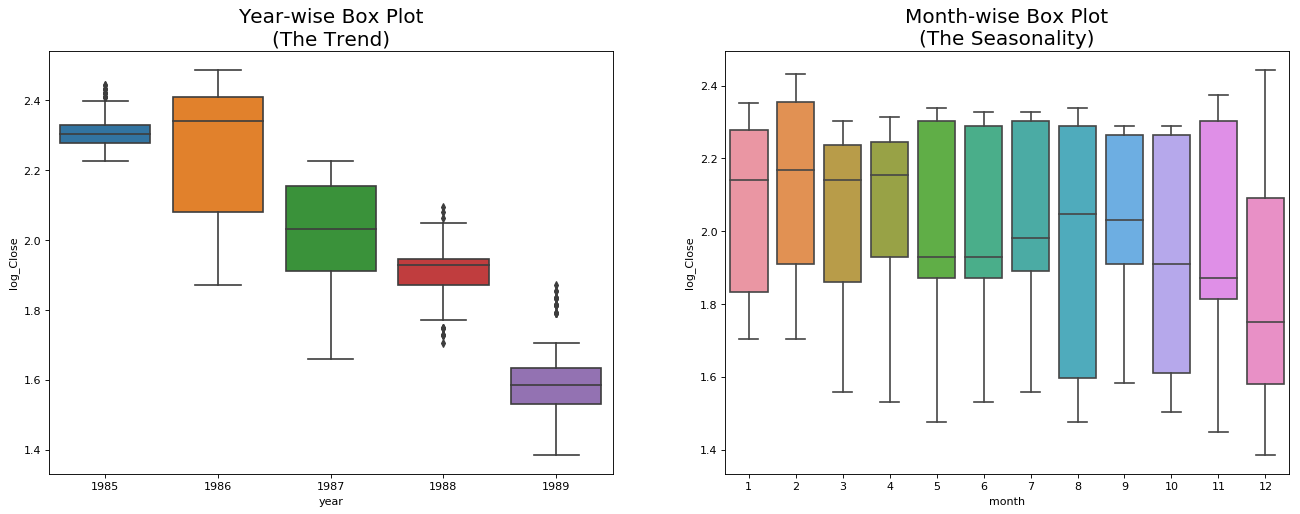

In [8]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='log_Close', data=dataset, ax=axes[0])
sns.boxplot(x='month', y='log_Close', data=dataset.loc[~dataset.year.isin([1986, 1996]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(dataset['log_Close'], model='multiplicative', extrapolate_trend='freq', freq = 30)

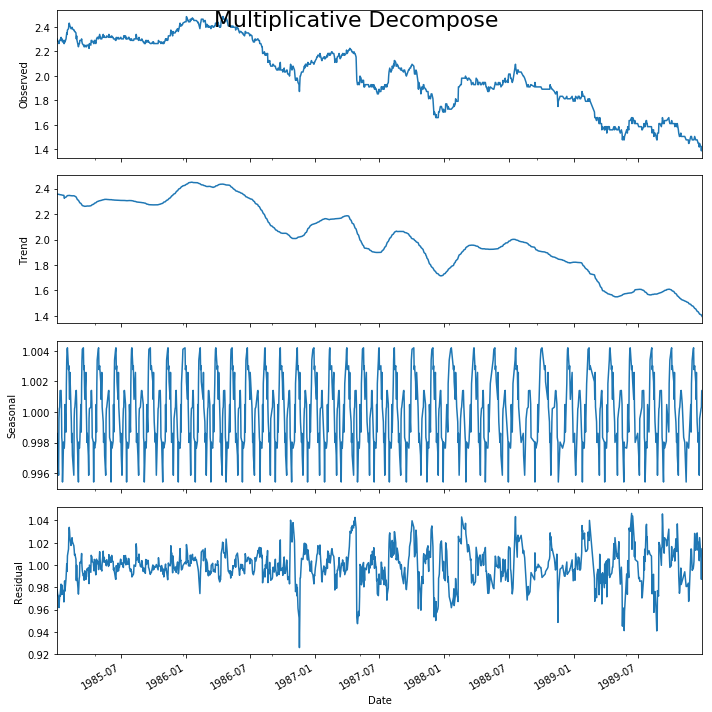

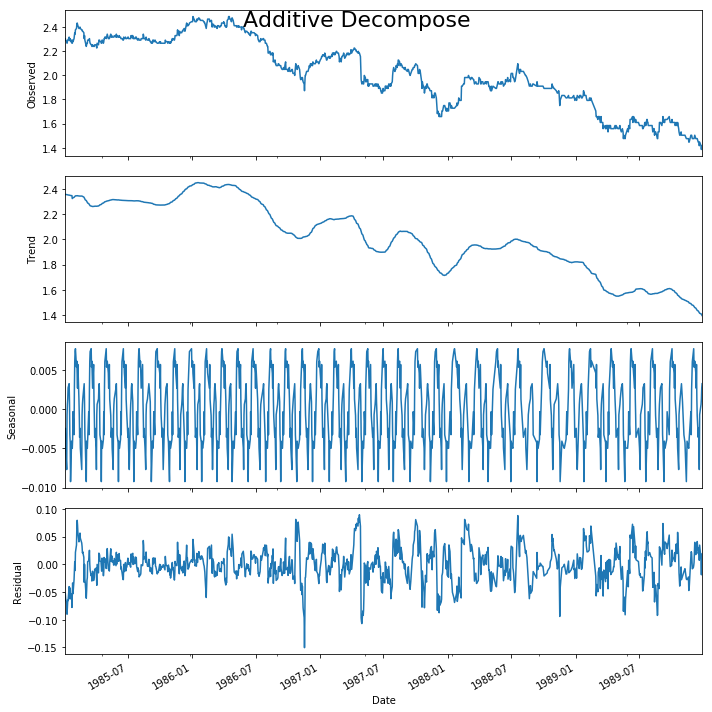

In [10]:


# Additive Decomposition
result_add = seasonal_decompose(dataset['log_Close'], model='additive', extrapolate_trend='freq', freq=30)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [11]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
1985-01-02,0.998013,2.358360,0.972950,2.290006
1985-01-03,0.998607,2.357561,0.978043,2.302585
1985-01-04,0.997170,2.356762,0.974433,2.290006
1985-01-07,0.995868,2.355963,0.970608,2.277267
1985-01-08,0.999563,2.355164,0.961867,2.264364


In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(dataset.Close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.5666806229602853
p-value: 0.8783345174623103
Critial Values:
   1%, -3.4365517520261637
Critial Values:
   5%, -2.86427826065702
Critial Values:
   10%, -2.5682279541355597


In [ ]:
# KPSS Test
result = kpss(dataset.Close.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    
    print('Critial Values:')
    print(f'   {key}, {value}')

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(dataset.Close.values)
plt.plot(detrended)
plt.title('Close detrended by subtracting the least squares fit', fontsize=16)

In [ ]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(dataset['log_Close'], model='multiplicative', extrapolate_trend='freq', freq=365)
detrended = dataset.Close.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

In [ ]:
# Deseasonalize
deseasonalized = dataset.log_Close.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Close Deseasonalized', fontsize=16)
plt.plot()

In [ ]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(dataset.log_Close.tolist())

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot

fig, axes = plt.subplots(1, 6, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:6]):
    lag_plot(dataset.log_Close, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Close', y=1.05)    
plt.show()

In [ ]:

rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(dataset.log_Close, m=2, r=0.2*np.std(dataset.Close)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

In [ ]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(dataset.Close, m=2, r=0.2*np.std(dataset.Close)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(dataset[['Close', 'month']], maxlag=2)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)